# **MÓDULO 14 - Exercício**
# Pré Processamento dos Dados - A primeira etapa Pré Modelagem

Para nossa atividade usaremos uma base de churn também, porém essa base não diz respeito a serviços bancários e sim serviços de internet, telefone e tv - Telecomunicação.

Vamos realizar aqui as etapas de limpeza e tratamento de dados vistos durante a aula, porém aplicados a essa base nova.

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CHURN_TELECON_MOD08_TAREFA.csv", delimiter=';')

df.head(10)

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),NaN,1840.75,No
4,9237-HQITU,NaN,0,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,Yes
5,9305-CDSKC,NaN,0,No,No,8,Yes,Fiber optic,No,No,Yes,Month-to-month,Electronic check,NaN,820.50,NaN
6,1452-KIOVK,NaN,0,No,Yes,22,Yes,Fiber optic,No,No,Yes,Month-to-month,Credit card (automatic),NaN,1949.40,NaN
7,6713-OKOMC,NaN,0,No,No,10,No,DSL,Yes,No,No,Month-to-month,Mailed check,NaN,301.90,NaN
8,7892-POOKP,NaN,0,Yes,No,28,Yes,Fiber optic,No,Yes,Yes,Month-to-month,Electronic check,NaN,3046.05,NaN
9,6388-TABGU,NaN,0,No,Yes,62,Yes,dsl,Yes,No,No,One year,Bank transfer (automatic),NaN,3487.95,NaN


Legenda dos dados:

*   **CustomerID** : Esse é o ID único de cada cliente nosso da rede de produtos de telecomunicação.

*   **Genero** : O genero dos nossos clientes.

*   **Idoso** : Se nosso cliente tem acima de 60 anos ou não. (Sim = 1 | Não = 0)

*   **Casado** : Se nosso cliente é casado ou não.

*   **Dependents** : Se cliente tem dependentes.

*   **Tempo_como_Cliente** : Tempo em meses que nosso cliente está com a nossa empresa.

*   **PhoneService** : Se ele contratou serviço telefônico com a nossa empresa.

*   **Servico_Internet** : Qual o tipo de serviço de internet contratado.

*   **Servico_Seguranca** : Se ele contratou serviço de segurança com a nossa empresa.

*   **Suporte_Tecnico** : Se já acionou o suporte técnico.

*   **StreamingTV** : Se ele contratou serviço de streaming para TV.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **PaymentMethod** : Forma de Pagamento.

*   **Pagamento_Mensal** : Quanto o cliente pagava mensalmente.

*   **Total_Pago** : Total já pago pelo cliente para nossa companhia.

*   **Churn** : Nossa coluna mais importante, se nosso cliente nos abandonou ou não.




# 1 - Carregue a base, verifique se os tipos de dados estão de acordo com cada coluna e caso não estejam realize a transformação dos tipos de dados.

In [9]:
df.dtypes

customerID             object
Genero                 object
Idoso                   int64
Casado                 object
Dependents             object
Tempo_como_Cliente      int64
PhoneService           object
Servico_Internet       object
Servico_Seguranca      object
Suporte_Tecnico        object
StreamingTV            object
Tipo_Contrato          object
PaymentMethod          object
Pagamento_Mensal      float64
Total_Pago            float64
Churn                  object
dtype: object

# 2 - Esse exercício faremos por etapas:
A) Verifique se temos colunas com dados faltantes e traga a % dos dados faltantes por coluna.

In [15]:
df.isnull().values.any()

True

In [17]:
(df.isnull().sum() / len(df)) * 100

customerID             0.00
Genero                 0.48
Idoso                  0.00
Casado                 0.00
Dependents             0.00
Tempo_como_Cliente     0.00
PhoneService          59.28
Servico_Internet       0.00
Servico_Seguranca      0.00
Suporte_Tecnico        0.00
StreamingTV            0.00
Tipo_Contrato          0.00
PaymentMethod          0.00
Pagamento_Mensal      13.00
Total_Pago             0.00
Churn                  0.20
dtype: float64

B) Exclua nessa etapa as linhas das colunas com dados faltantes que você analisar que esse método é o ideal. Justifique o motivo de estar excluindo essas linhas.

In [20]:
#Como representam apenas 0,48% dos dados, a exclusão é segura e não compromete a análise.
df.dropna(subset=['Genero'], inplace=True)

In [22]:
#Refazendo a fórmula anterior, notamos que agora não existem mais valores nulos em Churn.
(df.isnull().sum() / len(df)) * 100

customerID             0.000000
Genero                 0.000000
Idoso                  0.000000
Casado                 0.000000
Dependents             0.000000
Tempo_como_Cliente     0.000000
PhoneService          59.565916
Servico_Internet       0.000000
Servico_Seguranca      0.000000
Suporte_Tecnico        0.000000
StreamingTV            0.000000
Tipo_Contrato          0.000000
PaymentMethod          0.000000
Pagamento_Mensal      12.580386
Total_Pago             0.000000
Churn                  0.000000
dtype: float64

C) Nessa etapa substitua pela média, mediana ou moda as linhas das colunas com valores faltantes que você analisou e entendeu que esse era o melhor método. Não se esqueça de justificar sua escolha.

**Dica variáveis numéricas:** Não se esqueça de verificar a distrbuição dos dados, média e mediana.

**Dica variáveis categóricas:** Caso precise substituir uma variável categórica utilize um gráfico de barras para verificar a que mais aparece e utilizar ela na substituição.
Ou você pode optar por excluir a coluna, mas justifique sua escolha.

Caso opte por substituir você pode utilizar a função fillna:
df['SUACOLUNA'].fillna("VALOR QUE SUBSTITUIRA O NULO", inplace=True)
Ela funcionará como a replace.

In [27]:
df['Pagamento_Mensal'].mean()

65.60756321839081

In [29]:
df['Pagamento_Mensal'].median()

71.45

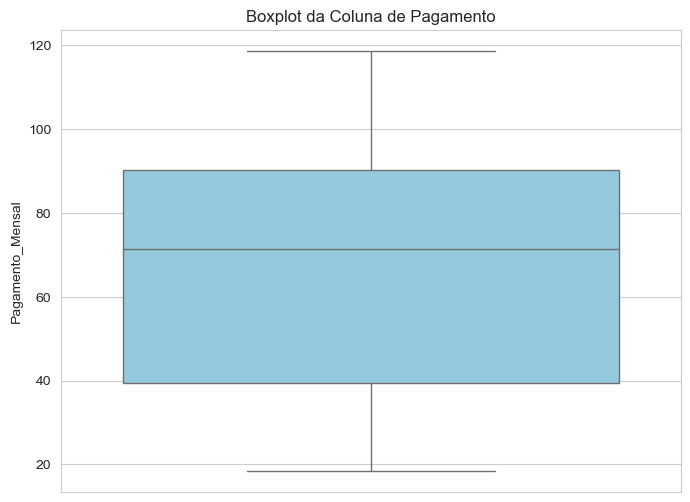

In [31]:
sns.set_style('whitegrid')

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Pagamento_Mensal', color='skyblue')
plt.title('Boxplot da Coluna de Pagamento')
plt.ylabel('Pagamento_Mensal')
plt.show()

In [35]:
#Após checar a média, a mediana e verificar o gráfico de Boxplot sem outliers, optei em substituir pela mediana, por trazer dados mais robustos.
df['Pagamento_Mensal'].fillna(df['Pagamento_Mensal'].median(), inplace=True)

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_15240\2731672908.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Pagamento_Mensal'].fillna(df['Pagamento_Mensal'].median(), inplace=True)


In [37]:
df['Pagamento_Mensal'].isnull().sum()

0

# **Apenas um adendo**: Notei posteriormente, que seria possível trazer o valor exato pago por mês, dividindo o total pago (que não possuía valores nulos) pela quantidade de meses. Porém iria fugir do exercício e eu não tenho tal capacidade em python para tal ainda.

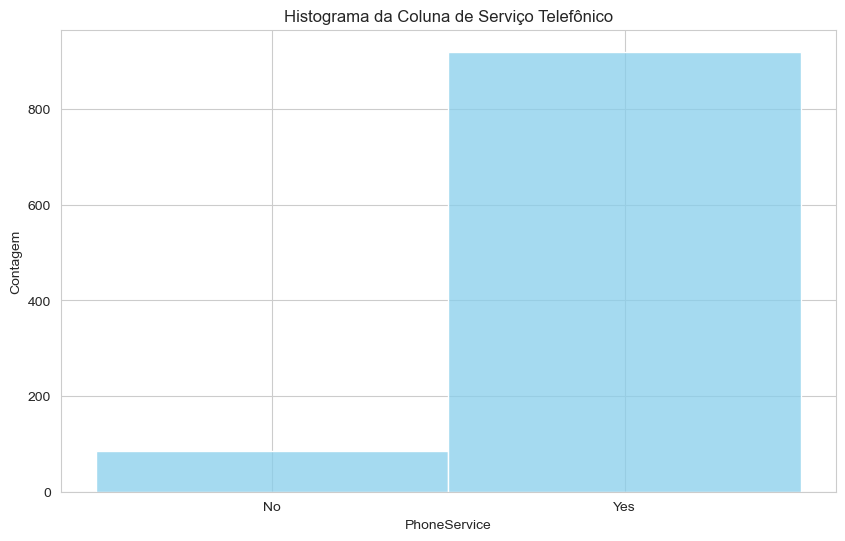

In [40]:
#Primeiro irei verificar a proporção da coluna, mas já desde antes já estou decidido a excluir, por conter apenas 40% dos dados preenchidos.
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='PhoneService', discrete=True, color='skyblue')
plt.title('Histograma da Coluna de Serviço Telefônico')
plt.xlabel('PhoneService')
plt.ylabel('Contagem')
plt.show()

In [42]:
#Como esse volume de nulos compromete a representatividade dos dados restantes, e seu preenchimento traria viés, optei por excluir essa variável do conjunto de dados.
df.drop(columns=['PhoneService'], inplace=True)

In [44]:
#Aqui eu confirmo se não existem mais dados nulos na base.
df.isnull().values.any()

False

# 3 - Verifique se encontramos valores digitados incorretamente, ou com letras maiusculas ou minusculas, ou até mesmo mesmos valores porém escritos de forma dirente e corrija.

In [47]:
#Aqui precisei de ajuda de IA para desenvolver um código que conseguisse mostrar, sem a necessidade de plotar um gráfico coluna por coluna.
df.apply(lambda col: col.unique())

customerID            [7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...
Genero                                          [Female, Male, F, M, f]
Idoso                                                            [0, 1]
Casado                                                        [Yes, No]
Dependents                                                    [No, Yes]
Tempo_como_Cliente    [1, 34, 2, 45, 52, 71, 10, 21, 12, 58, 49, 30,...
Servico_Internet                            [DSL, No, Fiber optic, dsl]
Servico_Seguranca                        [No, Yes, No internet service]
Suporte_Tecnico                          [No, Yes, No internet service]
StreamingTV                              [No, No internet service, Yes]
Tipo_Contrato                      [Month-to-month, One year, Two year]
PaymentMethod         [Electronic check, Mailed check, Bank transfer...
Pagamento_Mensal      [29.85, 56.95, 53.85, 71.45, 64.9, 95.45, 90.4...
Total_Pago            [29.85, 1889.5, 108.15, 1840.75, 1022.95, 

In [49]:
df['Genero'] = df['Genero'].replace('F', 'Female')
df['Genero'] = df['Genero'].replace('f', 'Female') #Aqui pensei em uma alternativa de usar o "&", mas não deu certo, então criei outra linha igual.
df['Genero'] = df['Genero'].replace('M', 'Male')
df['Servico_Internet'] = df['Servico_Internet'].replace('dsl', 'DSL')
df['Servico_Seguranca'] = df['Servico_Seguranca'].replace('No internet service', 'No')
df['Suporte_Tecnico'] = df['Suporte_Tecnico'].replace('No internet service', 'No')
df['StreamingTV'] = df['StreamingTV'].replace('No internet service', 'No')

In [51]:
df.apply(lambda col: col.unique())

customerID            [7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...
Genero                                                   [Female, Male]
Idoso                                                            [0, 1]
Casado                                                        [Yes, No]
Dependents                                                    [No, Yes]
Tempo_como_Cliente    [1, 34, 2, 45, 52, 71, 10, 21, 12, 58, 49, 30,...
Servico_Internet                                 [DSL, No, Fiber optic]
Servico_Seguranca                                             [No, Yes]
Suporte_Tecnico                                               [No, Yes]
StreamingTV                                                   [No, Yes]
Tipo_Contrato                      [Month-to-month, One year, Two year]
PaymentMethod         [Electronic check, Mailed check, Bank transfer...
Pagamento_Mensal      [29.85, 56.95, 53.85, 71.45, 64.9, 95.45, 90.4...
Total_Pago            [29.85, 1889.5, 108.15, 1840.75, 1022.95, 

# [EXTRA] 4 - Caso deseje, para manter um padrão na sua base, renomeie as colunas ou deixando em português, ou inglês.

In [60]:
#Optei por substituir o nome das colunas, já que substituir o conteúdo delas iria ser mais complexo, visto que todos já estão em inglês.
df.rename(columns={'Genero': 'Gender'}, inplace=True)
df.rename(columns={'Idoso': 'Senior'}, inplace=True)
df.rename(columns={'Casado': 'Married'}, inplace=True)
df.rename(columns={'Tempo_como_Cliente': 'Tenure'}, inplace=True)
df.rename(columns={'Servico_Internet': 'Internet_Service'}, inplace=True)
df.rename(columns={'Servico_Seguranca': 'Security_Service'}, inplace=True)
df.rename(columns={'Suporte_Tecnico': 'Technical_Support'}, inplace=True)
df.rename(columns={'Tipo_Contrato': 'Contract_Type'}, inplace=True)
df.rename(columns={'Pagamento_Mensal': 'Monthly_Charges'}, inplace=True)
df.rename(columns={'Total_Pago': 'Total_Charges'}, inplace=True)

In [62]:
df.head()

,customerID,Gender,Senior,Married,Dependents,Tenure,Internet_Service,Security_Service,Technical_Support,StreamingTV,Contract_Type,PaymentMethod,Monthly_Charges,Total_Charges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,DSL,Yes,Yes,No,One year,Bank transfer (automatic),71.45,1840.75,No
16,8191-XWSZG,Female,0,No,No,52,No,No,No,No,One year,Mailed check,71.45,1022.95,No


In [64]:
df.to_csv('CHURN_CREDIT_MOD15_PART02.csv', index=False)